In [31]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
pd.set_option('display.max_columns',None)



from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly

sns.set(style='whitegrid')
plt.rcParams['figure.figsize']=(15,5)
%config InlineBackend.figure_format = 'png'
%matplotlib inline

Загружаем данные в датафреймы 

In [32]:
df_shops = pd.read_pickle("./df_shops.pkl")
df_points = pd.read_pickle("./df_points.pkl")
df_left = pd.read_pickle("./df_left.pkl")


In [33]:

df_category = pd.read_pickle("./df_category.pkl")
df_checks_with_cat = pd.read_pickle("./df_checks_with_cat.pkl")
df_pivot_table = pd.read_pickle("./df_pivot_table.pkl")
df_week_diff = pd.read_pickle("./df_week_diff.pkl")
df_week_diff_cum = pd.read_pickle("./df_week_diff_cum.pkl")


Выделяем молочную продукцию

In [34]:
df_checks_milk = df_checks_with_cat[df_checks_with_cat['name_gr'] == 'Молочная Продукция' ]

In [35]:
all_sales_bad = df_checks_milk[df_checks_milk['good_or_bad_y'] == -1 ]['BaseSum'].sum()
all_sales_average = df_checks_milk[df_checks_milk['good_or_bad_y'] == 0 ]['BaseSum'].sum()
all_sales_good = df_checks_milk[df_checks_milk['good_or_bad_y'] == 1 ]['BaseSum'].sum()

In [36]:
df_checks_milk.head(3)

,id_tt_cl,id_tov_cl,Quantity,date_ch,week,BaseSum,hour,name_gr,name_gr2,good_or_bad_y
0,10864,52,1.0,2022-03-01,9,119.09,13,Молочная Продукция,Сметана,-1.0
1,10864,52,1.0,2022-03-01,9,119.09,18,Молочная Продукция,Сметана,-1.0
2,10864,52,1.0,2022-03-01,9,119.09,20,Молочная Продукция,Сметана,-1.0


In [37]:
df_checks_milk_pivot = df_checks_milk.pivot_table(columns=['hour'],index=['good_or_bad_y'],values = ['BaseSum'],aggfunc= 'sum',fill_value=0).reset_index()

In [38]:
df_checks_milk_pivot.set_index(df_checks_milk_pivot['good_or_bad_y'],inplace=True)
del df_checks_milk_pivot['good_or_bad_y']
df_checks_milk_pivot = df_checks_milk_pivot.transpose()

In [39]:
df_checks_milk_pivot

good_or_bad_y        -1.0          0.0         1.0
        hour                                      
BaseSum 0          813.56        84.00        0.00
        1          473.24        41.82        0.00
        2         1872.72       572.70        0.00
        3           50.91      1004.56        0.00
        4           70.91       250.91       75.45
        5         2098.70       210.18        0.00
        6         7640.12      2079.77      197.32
        7       785262.94    275120.65     7356.66
        8      2385948.78   2075685.31   503421.36
        9      3654148.11   3719846.68  2008228.16
        10     4219121.26   5017516.18  2718435.05
        11     5393122.68   6653913.53  3795858.76
        12     6365146.06   8135887.61  4605914.61
        13     6445531.44   8189689.23  4680016.67
        14     5969810.00   7703070.90  4424828.95
        15     5955317.41   7667993.08  4321982.85
        16     6504549.27   8189251.86  4572633.54
        17     7341607.55   9095351.45  5100458.98
        18     8658083.47  10202377.45  5781604.50
        19     8566505.91  10070002.23  5677720.64
        20     6694239.59   7900712.62  4367668.58
        21     4520395.37   5286119.27  2776377.98
        22     1585605.56    632735.55    99980.90
        23      436906.10    145285.13      708.56

In [40]:
df_checks_milk_pivot[-1] = df_checks_milk_pivot[-1].div(all_sales_bad).mul(100)
df_checks_milk_pivot[1] = df_checks_milk_pivot[1].div(all_sales_good).mul(100)
df_checks_milk_pivot[0] = df_checks_milk_pivot[0].div(all_sales_average).mul(100)

In [47]:
#df_checks_milk_pivot.plot(kind="barh",figsize=(10,50))

In [48]:
df_checks_milk

,id_tt_cl,id_tov_cl,Quantity,date_ch,week,BaseSum,hour,name_gr,name_gr2,good_or_bad_y
0,10864,52,1.0,2022-03-01,9,119.09,13,Молочная Продукция,Сметана,-1.0
1,10864,52,1.0,2022-03-01,9,119.09,18,Молочная Продукция,Сметана,-1.0
2,10864,52,1.0,2022-03-01,9,119.09,20,Молочная Продукция,Сметана,-1.0
3,10864,52,1.0,2022-03-01,9,119.09,18,Молочная Продукция,Сметана,-1.0
4,10864,52,1.0,2022-03-01,9,119.09,14,Молочная Продукция,Сметана,-1.0
...,...,...,...,...,...,...,...,...,...,...
15963683,15714,59900,1.0,2022-05-31,22,22.91,18,Молочная Продукция,Детское ложковое молочное питание,0.0
15963684,15714,59900,2.0,2022-05-31,22,45.82,17,Молочная Продукция,Детское ложковое молочное питание,0.0
15963685,15714,59900,2.0,2022-05-31,22,41.12,17,Молочная Продукция,Детское ложковое молочное питание,0.0
15963686,15714,59900,1.0,2022-05-31,22,22.73,18,Молочная Продукция,Детское ложковое молочное питание,0.0


In [49]:
df_checks_milk_variety = df_checks_milk.pivot_table(columns=['hour'],index=['good_or_bad_y'],values = ['id_tov_cl'],aggfunc= 'nunique',fill_value=0).reset_index()

In [52]:
df_checks_milk_variety

id_tov_cl                                                     \
hour                  0  1   2  3  4   5   6    7    8    9   10   11   12   
good_or_bad_y                                                                
-1.0                  6  6  10  1  1  12  35  303  319  335  332  334  338   
 0.0                  1  1   5  1  2   2  17  259  311  318  320  325  326   
 1.0                  0  0   0  0  1   0   4   61  278  303  306  311  315   

                                                                      
hour            13   14   15   16   17   18   19   20   21   22   23  
good_or_bad_y                                                         
-1.0           333  336  337  342  341  339  342  344  337  327  304  
 0.0           326  325  329  326  331  328  327  328  331  304  255  
 1.0           319  314  311  313  320  318  322  317  312  216    9

In [51]:
df_checks_milk_variety.set_index(df_checks_milk_variety['good_or_bad_y'],inplace=True)
del df_checks_milk_variety['good_or_bad_y']

<AxesSubplot:ylabel='None,hour'>

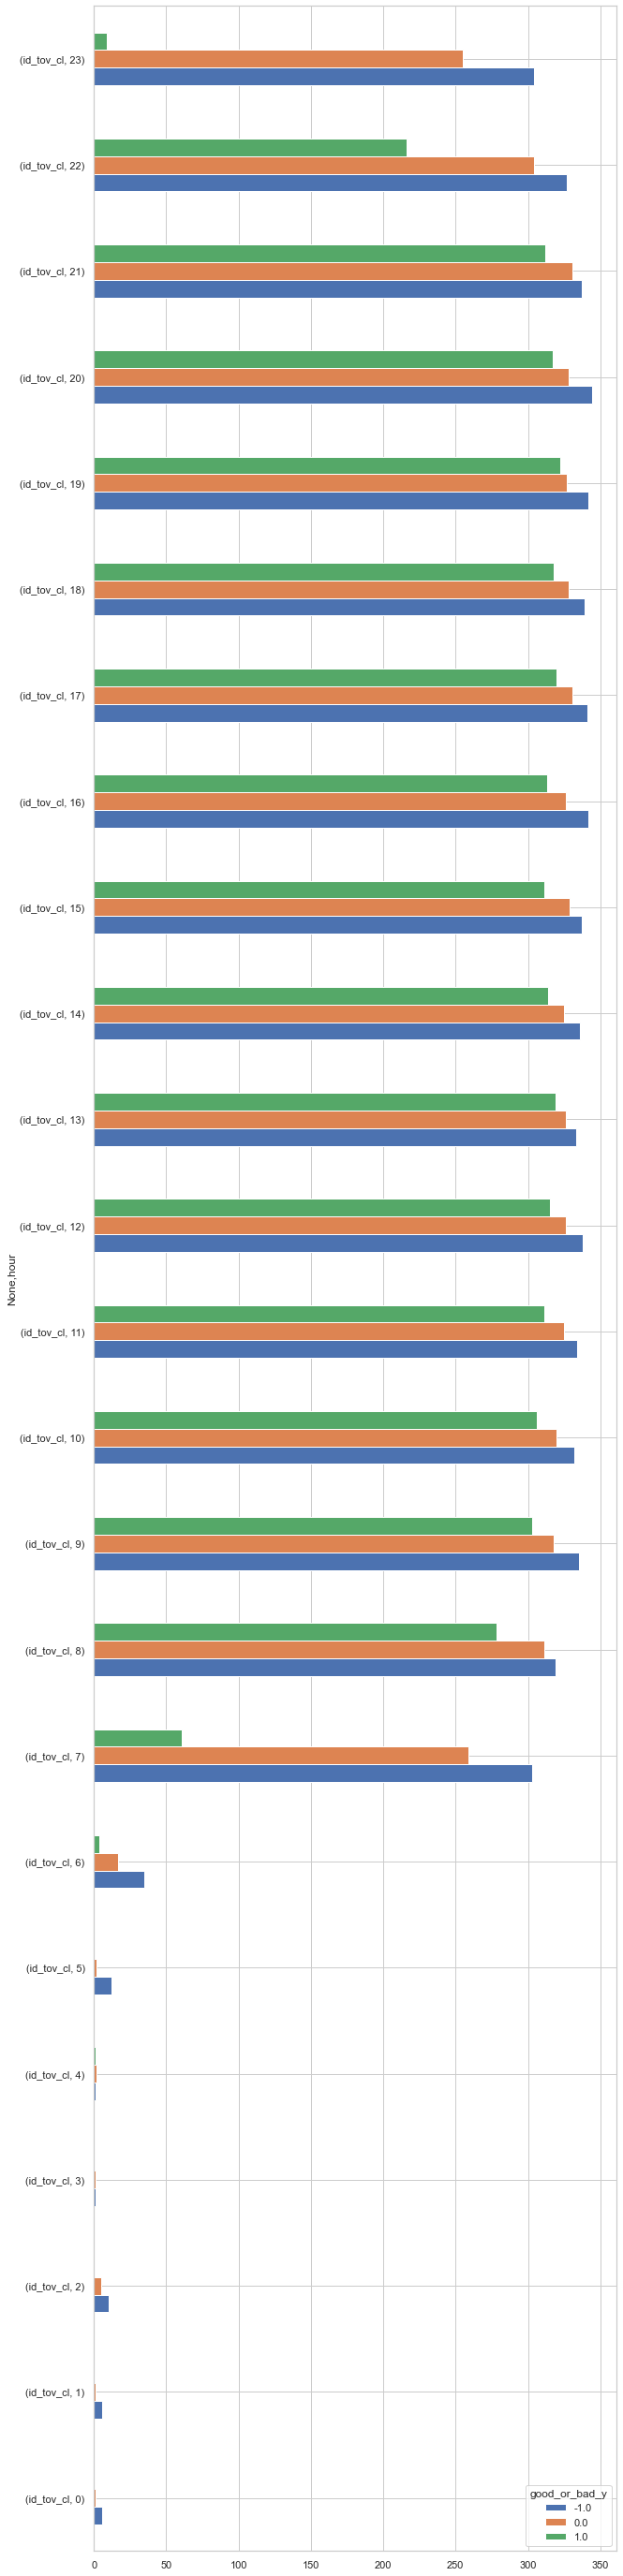

In [54]:
df_checks_milk_variety.transpose().plot(kind="barh",figsize=(10,50))